<a href="https://colab.research.google.com/github/RevatiJagdale/ML-experiments/blob/main/PythonModelDeployment_STM32Nucleof411re.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Temperature (°C): Typically in the range of 15°C to 40°C.\
Humidity (%): Relative humidity ranging from 10% to 90%.\
Timestamp: The time at which the data is collected.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                      │ (None, 16)                  │              32 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 177 (708.00 B)

 Trainable params: 177 (708.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.4783 - loss: 1.0534 - val_accuracy: 0.4500 - val_loss: 0.9132
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4808 - loss: 0.7798 - val_accuracy: 0.5500 - val_loss: 0.7404
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5146 - loss: 0.7139 - val_accuracy: 0.4500 - val_loss: 0.7553
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4898 - loss: 0.7293 - val_accuracy: 0.5500 - val_loss: 0.6953
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4920 - loss: 0.6961 - val_accuracy: 0.4500 - val_loss: 0.7103
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4916 - loss: 0.7023 - val_accuracy: 0.5500 - val_loss: 0.7065
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4796 - loss: 0.7213 - val_accuracy: 0.4500 - val_loss: 0.7102
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4991 - loss: 0.6964 - val_accuracy: 0.5500 - val_l

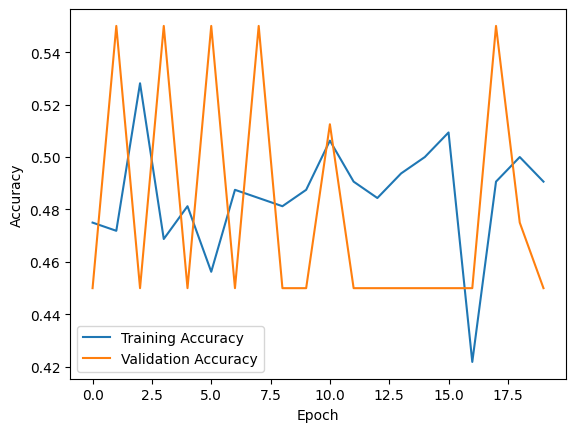

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

# File paths
normal_readings_path = "/content/htu2x_anomaly_readings.csv"
anomaly_readings_path = "/content/htu2x_anomaly_readings.csv"

# Load the datasets
normal_df = pd.read_csv(normal_readings_path)
anomaly_df = pd.read_csv(anomaly_readings_path)

# Renaming columns properly
normal_df.columns = ["Humidity"]
anomaly_df.columns = ["Humidity"]

# Adding labels: 0 for normal, 1 for anomaly
normal_df["Label"] = 0
anomaly_df["Label"] = 1

# Combine both datasets
data = pd.concat([normal_df, anomaly_df], ignore_index=True)

# Feature selection
X = data[['Humidity']].values
y = data['Label'].values

# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Neural Network Model
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(1,)))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Binary classification

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

# Training the model
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

# Plot Accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


   31.1793642
0   40.744882
1   51.778670
2   33.587827
3   44.147286
4   56.903652


In [ ]:
def classify_humidity(humidity):
    if humidity < 30:
        return 0
    elif 30 <= humidity <= 60:
        return 1
    else:
        return 2
data['Humidity_Class'] = data['Humidity (%)'].apply(classify_humidity)
print(data.head())
X = data[['Temperature (°C)', 'Humidity (%)']].values
y = data['Humidity_Class'].values

KeyError: 'Humidity (%)'

In [ ]:
import numpy as np
X = X.reshape(X.shape[0], X.shape[1], 1)
print(f"Input shape for CNN: {X.shape}")

Input shape for CNN: (1000, 2, 1)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

model = Sequential()

model.add(Conv1D(filters=32, kernel_size=2, activation='relu', input_shape=(X.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))


model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()


KeyboardInterrupt: 

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))


Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.2563 - loss: 6.8109 - val_accuracy: 0.5350 - val_loss: 1.2974
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6378 - loss: 0.9396 - val_accuracy: 0.6600 - val_loss: 0.6579
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7489 - loss: 0.5272 - val_accuracy: 0.7250 - val_loss: 0.5478
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7753 - loss: 0.4641 - val_accuracy: 0.7150 - val_loss: 0.5155
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7862 - loss: 0.4392 - val_accuracy: 0.7250 - val_loss: 0.5416
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7442 - loss: 0.4771 - val_accuracy: 0.7250 - val_loss: 0.5171
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7752 - loss: 0.4433 - val_accuracy: 0.7150 - val_loss: 0.4886
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7619 - loss: 0.4573 - val_accuracy: 0.7300 - val_loss

In [ ]:
# Evaluate the model on test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc:.2f}')

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7209 - loss: 0.4821 
Test Accuracy: 0.73


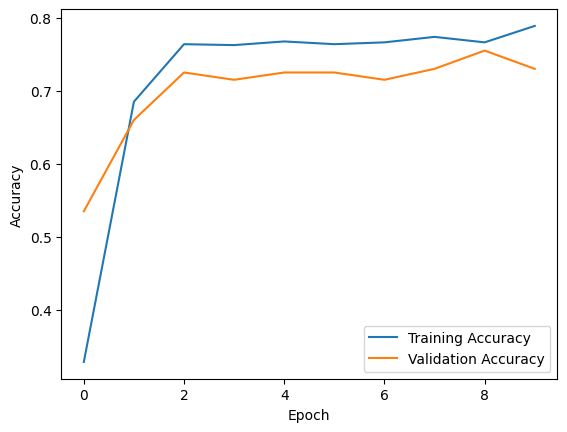

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
def generate(num_samples=1000):
    with open('htu2x_sensor_data.csv', mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(['Timestamp', 'Temperature (°C)', 'Humidity (%)'])
        for i in range(num_samples):

            temperature = random.uniform(15, 40)

            humidity = random.uniform(10, 90)

            timestamp = datetime.now().strftime("%Y-%m-%d %H:%M:%S")

            writer.writerow([timestamp, temperature, humidity])
            time.sleep(0.1)
generate()